In [1]:
import os 
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns 
import pandas as pd

## Dice overlap for emphysema scores 

In [10]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema"
emph_non_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_non_harm_exptoinsp_files = sorted(os.listdir(emph_non_harm_exptoinsp))

emph_bone_files, emph_non_harm_exptoinsp_files

(['COPDGene_A43240_BONE.nii.gz',
  'COPDGene_A61757_BONE_control.nii.gz',
  'COPDGene_B05639_BONE.nii.gz',
  'COPDGene_B14644_BONE.nii.gz',
  'COPDGene_B15777_BONE_control.nii.gz',
  'COPDGene_B17236_BONE_control.nii.gz',
  'COPDGene_B17317_BONE_control.nii.gz',
  'COPDGene_B72303_BONE_control.nii.gz',
  'COPDGene_B86334_BONE.nii.gz',
  'COPDGene_C05262_BONE_control.nii.gz',
  'COPDGene_C19536_BONE_control.nii.gz',
  'COPDGene_C40785_BONE_control.nii.gz',
  'COPDGene_C53764_BONE_control.nii.gz',
  'COPDGene_C64141_BONE_control.nii.gz',
  'COPDGene_C64303_BONE_control.nii.gz',
  'COPDGene_C64585_BONE.nii.gz',
  'COPDGene_C73437_BONE_control.nii.gz',
  'COPDGene_D32260_BONE_control.nii.gz',
  'COPDGene_D36309_BONE.nii.gz',
  'COPDGene_D41724_BONE_control.nii.gz',
  'COPDGene_D48362_BONE.nii.gz',
  'COPDGene_D70993_BONE.nii.gz',
  'COPDGene_D80990_BONE_control.nii.gz',
  'COPDGene_D90444_BONE.nii.gz',
  'COPDGene_E59904_BONE.nii.gz',
  'COPDGene_E69868_BONE.nii.gz',
  'COPDGene_E73754_BON

In [6]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emphysema"
emph_non_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_non_harm_exptoinsp_files = sorted(os.listdir(emph_non_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone_unharmonized = []

def dice_overlap(seg1, seg2):
    intersect = np.sum(seg1*seg2)
    fsum = np.sum(seg1)
    ssum = np.sum(seg2)
    dice = (2 * intersect) / (fsum + ssum)
    dice = np.mean(dice)
    dice = np.round(dice,3)
    return dice

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    non_harm_exptoinsp = nib.load(os.path.join(emph_non_harm_exptoinsp, emph_non_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, non_harm_exptoinsp)

    dice_overlap_bone_unharmonized.append(bone_dice)

100%|██████████| 50/50 [03:09<00:00,  3.71s/it]


In [7]:
emph_bone = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_harm_exptoinsp = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"

emph_bone_files = sorted(os.listdir(emph_bone))
emph_harm_exptoinsp_files = sorted(os.listdir(emph_harm_exptoinsp))

#compute dice overlap between regsitered and bone and registered and standard
dice_overlap_bone = []

def dice_overlap(seg1, seg2):
    intersect = np.sum(seg1*seg2)
    fsum = np.sum(seg1)
    ssum = np.sum(seg2)
    dice = (2 * intersect) / (fsum + ssum)
    dice = np.mean(dice)
    dice = np.round(dice,3)
    return dice

for i in tqdm(range(len(emph_bone_files))):
    bone = nib.load(os.path.join(emph_bone, emph_bone_files[i])).get_fdata()
    harm_exptoinsp = nib.load(os.path.join(emph_harm_exptoinsp, emph_harm_exptoinsp_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, harm_exptoinsp)

    dice_overlap_bone.append(bone_dice)

100%|██████████| 50/50 [03:08<00:00,  3.67s/it]


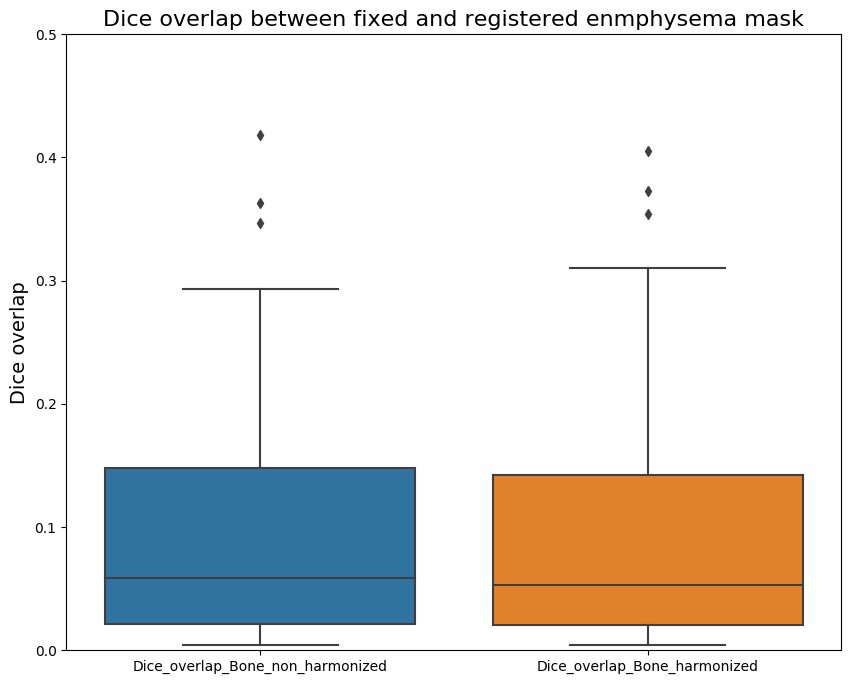

In [8]:
#Something is really wonky here! 

data = {
    'Dice_overlap_Bone_non_harmonized': dice_overlap_bone_unharmonized,
    'Dice_overlap_Bone_harmonized': dice_overlap_bone
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.ylabel("Dice overlap", fontsize=14)
plt.ylim(0, 0.5)
plt.title("Dice overlap between fixed and registered enmphysema mask", fontsize=16)
# plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/dice_overlap.tiff", dpi=300)
plt.show()

In [ ]:
# Compute range of standard deviation of dice overlap between registered and bone and registered and standard
mean_bone = np.mean(dice_overlap_bone)
mean_bone_unharmonized = np.mean(dice_overlap_bone_unharmonized)
std_dev_bone = np.std(dice_overlap_bone)
std_dev_bone_unharmonized = np.std(dice_overlap_bone_unharmonized)
print(f"Mean dice overlap between registered and bone: {mean_bone:.3f}")
print(f"Mean dice overlap between registered and standard: {mean_bone_unharmonized:.3f}")
print(f"Standard deviation of dice overlap between registered and bone: {std_dev_bone:.3f}")
print(f"Standard deviation of dice overlap between registered and standard: {std_dev_bone_unharmonized:.3f}")

Mean dice overlap between registered and bone: 0.102
Mean dice overlap between registered and standard: 0.116
Standard deviation of dice overlap between registered and bone: 0.109
Standard deviation of dice overlap between registered and standard: 0.123


In [ ]:
import scipy.stats as stats

#Paired t test 
pval, tstat = stats.ttest_rel(dice_overlap_bone, dice_overlap_bone_unharmonized)
print(pval, stat)

pval_wi, tstat_wi = stats.wilcoxon(dice_overlap_bone, dice_overlap_bone_unharmonized)
print(pval_wi, tstat_wi)

## Dice overlap between lung masks 

In [9]:
emph_bone_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_rigid_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_rigid_registered_emphysema_masks_warped"

emph_bone_harm_files = sorted(os.listdir(emph_bone_harm))
emph_rigid_reg_files = sorted(os.listdir(emph_rigid_reg))

emph_bone_harm_files, emph_rigid_reg_files

(['COPDGene_A43240_BONE.nii.gz',
  'COPDGene_A61757_BONE_control.nii.gz',
  'COPDGene_B05639_BONE.nii.gz',
  'COPDGene_B14644_BONE.nii.gz',
  'COPDGene_B15777_BONE_control.nii.gz',
  'COPDGene_B17236_BONE_control.nii.gz',
  'COPDGene_B17317_BONE_control.nii.gz',
  'COPDGene_B72303_BONE_control.nii.gz',
  'COPDGene_B86334_BONE.nii.gz',
  'COPDGene_C05262_BONE_control.nii.gz',
  'COPDGene_C19536_BONE_control.nii.gz',
  'COPDGene_C40785_BONE_control.nii.gz',
  'COPDGene_C53764_BONE_control.nii.gz',
  'COPDGene_C64141_BONE_control.nii.gz',
  'COPDGene_C64303_BONE_control.nii.gz',
  'COPDGene_C64585_BONE.nii.gz',
  'COPDGene_C73437_BONE_control.nii.gz',
  'COPDGene_D32260_BONE_control.nii.gz',
  'COPDGene_D36309_BONE.nii.gz',
  'COPDGene_D41724_BONE_control.nii.gz',
  'COPDGene_D48362_BONE.nii.gz',
  'COPDGene_D70993_BONE.nii.gz',
  'COPDGene_D80990_BONE_control.nii.gz',
  'COPDGene_D90444_BONE.nii.gz',
  'COPDGene_E59904_BONE.nii.gz',
  'COPDGene_E69868_BONE.nii.gz',
  'COPDGene_E73754_BON

In [ ]:
dice_overlap_rigid_reg = []

def dice_overlap(seg1, seg2):
    intersect = np.sum(seg1*seg2)
    fsum = np.sum(seg1)
    ssum = np.sum(seg2)
    dice = (2 * intersect) / (fsum + ssum)
    dice = np.mean(dice)
    dice = np.round(dice,3)
    return dice